In [1]:
# =============================================================================
# 1. KÜTÜPHANELERİN YÜKLENMESİ (ARAÇ ÇANTASI)
# =============================================================================

# Veri İşleme ve Analiz Kütüphaneleri
import pandas as pd  # Verileri tablo (DataFrame) halinde tutmak ve işlemek için (Excel gibi).
import numpy as np   # Matematiksel işlemler ve hızlı matris hesaplamaları için.

# Görselleştirme Kütüphaneleri
import matplotlib.pyplot as plt  # Grafikler oluşturmak için temel çizim kütüphanesi.
import seaborn as sns            # Matplotlib üzerine kurulu, daha estetik ve istatistiksel grafikler için.

# Makine Öğrenmesi - Veri Hazırlığı
from sklearn.model_selection import train_test_split # Veriyi Eğitim (Train) ve Sınav (Test) olarak bölmek için.
from sklearn.preprocessing import StandardScaler     # Verileri aynı ölçeğe (Scale) getirmek için (Büyük sayılar küçükleri ezmesin diye).

# Makine Öğrenmesi - Modeller (Algoritmalar)
# Regresyon Modelleri (Sayı Tahmini)
from sklearn.linear_model import LinearRegression      # En temel model: Verilerin ortasından geçen düz bir çizgi çizer.
from sklearn.tree import DecisionTreeRegressor         # Karar Ağacı: Veriyi sürekli sorular sorarak dallara ayırır.
from sklearn.ensemble import RandomForestRegressor     # Rastgele Orman: Yüzlerce karar ağacının ortalamasını alır (Daha güçlüdür).
from sklearn.svm import SVR                            # Destek Vektör Regresyonu: Veriyi ayırmak için en uygun sınır çizgisini bulur.

# Sınıflandırma Modelleri (Kategori Tahmini)
from sklearn.linear_model import LogisticRegression    # Lojistik Regresyon: Olasılık hesaplar (%50'den büyükse Evet, küçükse Hayır).
from sklearn.neighbors import KNeighborsClassifier     # KNN: "Bana arkadaşını söyle kim olduğunu söyleyeyim" mantığı (En yakın komşu).
from sklearn.svm import SVC                            # Destek Vektör Makinesi (Sınıflandırma versiyonu).
from sklearn.tree import DecisionTreeClassifier        # Karar Ağacı (Sınıflandırma versiyonu).
from sklearn.ensemble import RandomForestClassifier    # Rastgele Orman (Sınıflandırma versiyonu).

# Makine Öğrenmesi - Değerlendirme Metrikleri 
from sklearn.metrics import mean_squared_error, r2_score # Regresyon başarısını ölçmek için (Hata ve Açıklayıcılık).
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Sınıflandırma başarısını ölçmek için.

# Makine Öğrenmesi - Optimizasyon
from sklearn.model_selection import GridSearchCV # En iyi model ayarlarını (hiperparametreleri) otomatik bulmak için.

# Hazır Veri Setleri
from sklearn.datasets import fetch_california_housing, load_breast_cancer # Eğitimde kullanacağımız hazır veriler.

# Uyarıları Kapatma
import warnings
warnings.filterwarnings('ignore') # Kırmızı uyarı yazılarını gizler, çıktıyı temiz tutar.

# Grafik Stili Ayarı
plt.style.use('ggplot') # Grafiklerimizin daha profesyonel görünmesi için stil şablonu.

print("✅ Tüm kütüphaneler ve araçlar başarıyla yüklendi.")

✅ Tüm kütüphaneler ve araçlar başarıyla yüklendi.


In [2]:
# --- 2.1. VERİ HAZIRLIĞI ---
# California Konut Veri Setini indiriyoruz.
data_reg = fetch_california_housing()
print(data_reg.DESCR)  # Veri setinin açıklamasını yazdırıyoruz.

# Veriyi Pandas DataFrame'e (Tabloya) çeviriyoruz.
data_reg.data #Özellikler (Oda sayısı, Gelir, Konum vb.)
data_reg.feature_names #Sütun isimleri
X_reg = pd.DataFrame(data_reg.data, columns=data_reg.feature_names)

# Hedef değişkeni (Ev Fiyatı) alıyoruz.
y_reg = pd.Series(data_reg.target)

print(f"Regresyon Verisi Boyutu: {X_reg.shape}") # (Satır Sayısı, Sütun Sayısı)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
# --- 2.2. EĞİTİM VE TEST AYRIMI (SPLIT) ---

# Veriyi ikiye bölüyoruz:
# X_train, y_train: Modeli eğitmek için kullanacağımız "Ders Kitabı". (%80)
# X_test, y_test: Modelin başarısını ölçeceğimiz "Sınav Soruları". (%20)
# random_state=42: Her çalıştırdığımızda aynı ayrımı yapsın diye sabitliyoruz.
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# --- 2.3. ÖLÇEKLEME (SCALING) ---

# StandardScaler nesnesini oluşturuyoruz.
# Bu işlem, verilerin ortalamasını 0, standart sapmasını 1 yapar.
scaler = StandardScaler()

# Eğitim setine "fit" yapıp (kuralı öğrenip) "transform" (uyguluyoruz).
X_train_sc = scaler.fit_transform(X_train)

# Test setine SADECE "transform" uyguluyoruz.
# DİKKAT: Test setinin özelliklerini modele göstermemeliyiz (Data Leakage'ı önlemek için).
X_test_sc = scaler.transform(X_test)


In [4]:
# Kullanacağımız tüm regresyon modellerini bir sözlük (dictionary) içinde topluyoruz.
reg_models = {
    "Linear Regression": LinearRegression(), # En temel model.
    "Decision Tree": DecisionTreeRegressor(random_state=42), # Karar ağacı modeli.
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42), # 50 ağaçlı orman.
    "SVR (Support Vector)": SVR() # Destek Vektör Regresyonu (Büyük veride yavaş olabilir).
}

# Sonuçları kaydetmek için boş bir liste oluşturuyoruz.
results_reg = []

print(f"{'MODEL ADI':<30} | {'R2 SKORU (Başarı)':<20} | {'MSE (Hata)'}")
print("-" * 65)

# Döngü ile her modeli sırayla alıp eğitiyoruz.
for name, model in reg_models.items():
    
    # 1. ADIM: EĞİTİM (.fit)
    # Model, eğitim verilerine (X_train_sc, y_train) bakarak aradaki matematiksel ilişkiyi öğrenir.
    model.fit(X_train_sc, y_train)
    
    # 2. ADIM: TAHMİN (.predict)
    # Model, hiç görmediği sınav sorularını (X_test_sc) çözer ve tahminlerini (y_pred) üretir.
    y_pred = model.predict(X_test_sc)
    
    # 3. ADIM: DEĞERLENDİRME (METRİKLER)
    # R2 Skoru: Model veriyi ne kadar iyi açıklıyor? (1.0 mükemmel, 0.0 kötü)
    r2 = r2_score(y_test, y_pred)
    # MSE (Mean Squared Error): Hataların karesinin ortalaması. (0'a ne kadar yakınsa o kadar iyi).
    mse = mean_squared_error(y_test, y_pred)
    
    # Sonuçları listeye ekliyoruz.
    results_reg.append({"Model": name, "R2": r2, "MSE": mse})
    
    # Ekrana yazdırıyoruz.
    print(f"{name:<30} | {r2:.4f}               | {mse:.4f}")

MODEL ADI                      | R2 SKORU (Başarı)    | MSE (Hata)
-----------------------------------------------------------------
Linear Regression              | 0.5758               | 0.5559
Decision Tree                  | 0.6230               | 0.4940
Random Forest                  | 0.8039               | 0.2570
SVR (Support Vector)           | 0.7276               | 0.3570


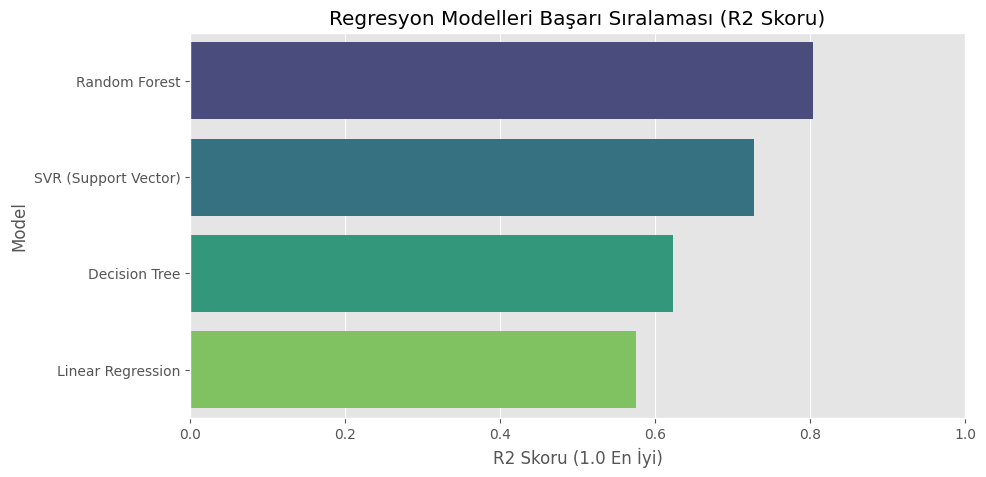

In [5]:
# Sonuç listesini Pandas DataFrame'e çeviriyoruz (Grafik çizmek kolay olsun diye).
df_res_reg = pd.DataFrame(results_reg).sort_values(by="R2", ascending=False) # R2'ye göre sırala.

plt.figure(figsize=(10, 5)) # Grafik boyutunu ayarla.
# Seaborn ile bar grafiği çiziyoruz.
sns.barplot(x="R2", y="Model", data=df_res_reg, palette="viridis")
plt.title("Regresyon Modelleri Başarı Sıralaması (R2 Skoru)") # Başlık
plt.xlabel("R2 Skoru (1.0 En İyi)") # X ekseni etiketi
plt.xlim(0, 1) # X eksenini 0 ile 1 arasına sabitle.
plt.show() # Grafiği göster.

In [6]:
# --- 3.1. VERİ HAZIRLIĞI ---

# Meme Kanseri veri setini yüklüyoruz.
data_clf = load_breast_cancer()

# Özellikleri DataFrame yapıyoruz (Tümör çapı, dokusu vb.).
X_clf = pd.DataFrame(data_clf.data, columns=data_clf.feature_names)

# Hedef değişkeni alıyoruz. (0: Kötü Huylu/Malignant, 1: İyi Huylu/Benign)
y_clf = pd.Series(data_clf.target)

print(data_clf.DESCR)  # Veri setinin açıklamasını yazdırıyoruz.

print(f"Sınıflandırma Verisi Boyutu: {X_clf.shape}") # (Satır Sayısı, Sütun Sayısı)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
# --- 3.2. EĞİTİM VE TEST AYRIMI ---

# Yine %80 eğitim, %20 test olarak ayırıyoruz.
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# --- 3.3. ÖLÇEKLEME (SCALING) ---

# Sınıflandırmada özellikle KNN ve SVM için ölçekleme çok kritiktir.
scaler_c = StandardScaler()
X_train_csc = scaler_c.fit_transform(X_train_c) # Eğitime göre ölçekle.
X_test_csc = scaler_c.transform(X_test_c)       # Testi aynı şekilde dönüştür.

MODEL ADI                      | ACCURACY (DOĞRULUK)
--------------------------------------------------
Logistic Regression            | %97.37
KNN (k=5)                      | %94.74
SVM                            | %98.25
Decision Tree                  | %94.74
Random Forest                  | %96.49


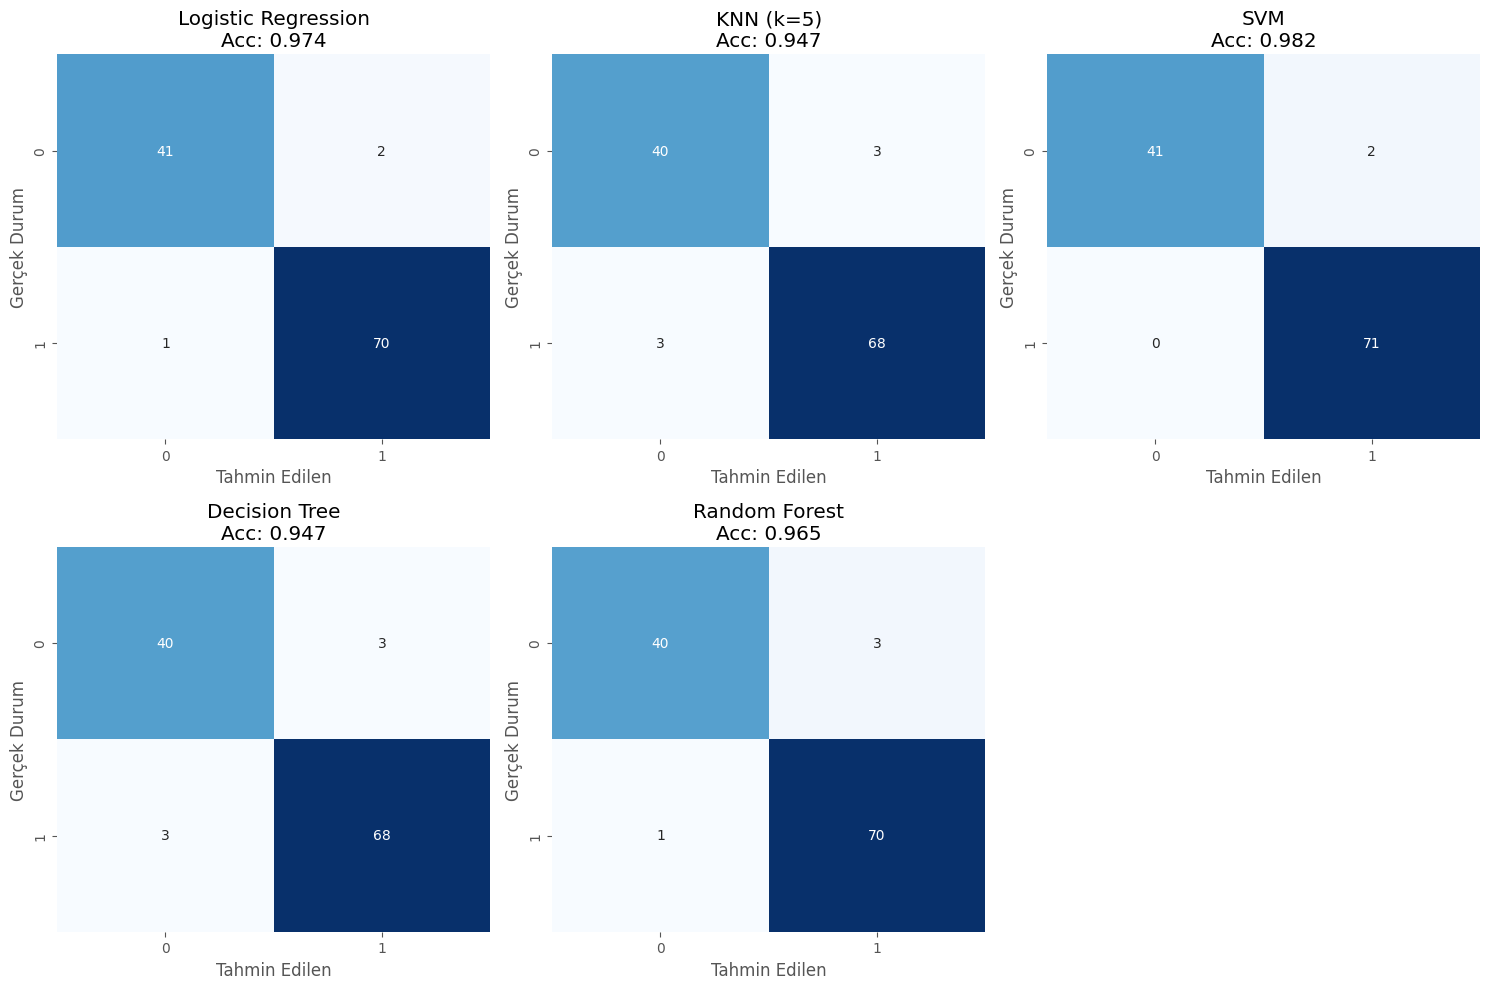

In [8]:
clf_models = {
    "Logistic Regression": LogisticRegression(), # Temel olasılık modeli.
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5), # En yakın 5 komşuya bakarak karar verir.
    "SVM": SVC(), # Destek Vektör Makinesi (Güçlü bir ayırıcıdır).
    "Decision Tree": DecisionTreeClassifier(random_state=42), # Karar ağacı.
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42) # Rastgele Orman.
}

print(f"{'MODEL ADI':<30} | {'ACCURACY (DOĞRULUK)'}")
print("-" * 50)

# Grafik çizimi için büyük bir alan (Figure) açıyoruz.
plt.figure(figsize=(15, 10))
plot_index = 1 # Alt grafiklerin (subplot) sırasını tutmak için sayaç.

for name, model in clf_models.items():
    
    # 1. EĞİTİM (.fit)
    model.fit(X_train_csc, y_train_c)
    
    # 2. TAHMİN (.predict)
    y_pred_c = model.predict(X_test_csc)
    
    # 3. DEĞERLENDİRME
    # Accuracy Score: Doğru bilinenlerin toplam veriye oranı.
    acc = accuracy_score(y_test_c, y_pred_c)
    print(f"{name:<30} | %{acc*100:.2f}")
    
    # Confusion Matrix (Hata Matrisi):
    # Modelin nerede hata yaptığını gösterir (Gerçekte 1 iken 0 mı dedi?).
    cm = confusion_matrix(y_test_c, y_pred_c)
    
    # Matrisi Görselleştirme (Heatmap)
    plt.subplot(2, 3, plot_index) # 2 satır 3 sütunluk alanda sıradaki yere çiz.
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) # annot=True: Sayıları yaz.
    plt.title(f"{name}\nAcc: {acc:.3f}") # Başlığa model adını ve skorunu yaz.
    plt.ylabel('Gerçek Durum') # Y ekseni: Gerçekler
    plt.xlabel('Tahmin Edilen') # X ekseni: Modelin Tahminleri
    
    plot_index += 1 # Bir sonraki grafik için sayacı artır.

plt.tight_layout() # Grafikler birbirine girmesin diye boşlukları ayarla.
plt.show() # Grafikleri ekrana bas.

In [9]:
print("\n--- DETAYLI RAPOR (RANDOM FOREST) ---")
rf_model = clf_models["Random Forest"] # Eğitilmiş modeli sözlükten geri alıyoruz.
y_final_pred = rf_model.predict(X_test_csc) # Tekrar tahmin yapıyoruz.

# Classification Report: Precision, Recall ve F1 skorlarını gösterir.
# target_names: Çıktıdaki 0 ve 1 yerine anlamlı isimler yazar.
print(classification_report(y_test_c, y_final_pred, target_names=['Kötü Huylu', 'İyi Huylu']))


--- DETAYLI RAPOR (RANDOM FOREST) ---
              precision    recall  f1-score   support

  Kötü Huylu       0.98      0.93      0.95        43
   İyi Huylu       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
print("\n--- BÖLÜM 4: MODEL OPTİMİZASYONU (GRID SEARCH) ---")
# Amaç: Random Forest modelindeki 'n_estimators' (ağaç sayısı) gibi ayarları
# elle denemek yerine bilgisayara en iyisini buldurtmak.

# Denenecek parametrelerin listesi (Sözlük formatında)
param_grid = {
    'n_estimators': [50, 100, 200], # Ağaç sayısı: 50 mi, 100 mü, 200 mü olsun?
    'max_depth': [None, 10, 20]     # Derinlik sınırı olsun mu?
}

# GridSearchCV nesnesi oluşturuyoruz.
# estimator: Hangi modeli optimize edeceğiz? (RandomForestClassifier)
# param_grid: Hangi ayarları deneyeceğiz?
# cv=3: Çapraz Doğrulama (Cross Validation). Her denemeyi 3 farklı veri parçasıyla yap.
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           verbose=1) # verbose=1: İşlem sırasında bilgi ver.

print("En iyi parametreler aranıyor (Bu işlem biraz sürebilir)...")
grid_search.fit(X_train_csc, y_train_c) # Eğitimi başlatıyoruz.

# Sonuçları yazdırıyoruz.
print(f"EN İYİ PARAMETRELER: {grid_search.best_params_}")
print(f"EN İYİ SKOR (Doğruluk): {grid_search.best_score_:.4f}")




--- BÖLÜM 4: MODEL OPTİMİZASYONU (GRID SEARCH) ---
En iyi parametreler aranıyor (Bu işlem biraz sürebilir)...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
EN İYİ PARAMETRELER: {'max_depth': None, 'n_estimators': 50}
EN İYİ SKOR (Doğruluk): 0.9560
